In [1]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config["datapath_10G"])
purchased_items = pathlib.Path(r"processed_data_1") / origin_files.name
login_history = pathlib.Path(r"processed_data_2") / origin_files.name

# origin_files = pathlib.Path(r"test1")
# purchased_items = pathlib.Path(r"test2")


In [2]:
# df0 = dd.read_parquet(origin_files)#.set_index('id',sorted=True)
# df1  = dd.read_parquet(purchased_items)#.set_index('id',sorted=True)
df0 = dd.read_parquet(origin_files).repartition(npartitions=1).reset_index(drop=True)#.set_index('id',sorted=True)
df1  = dd.read_parquet(purchased_items).repartition(npartitions=1).reset_index(drop=True)#.set_index('id',sorted=True)
df2  = dd.read_parquet(login_history).repartition(npartitions=1).reset_index(drop=True)#.set_index('id',sorted=True)
df = dd.concat([df0,df1,df2],axis=1)

In [3]:
for k in df.columns:
    print((k,df[k].dtypes))

('id', id    int64
id    int64
id    int64
dtype: object)
('last_login', string[pyarrow])
('user_name', string[pyarrow])
('fullname', string[pyarrow])
('email', string[pyarrow])
('age', dtype('int64'))
('income', dtype('float64'))
('gender', string[pyarrow])
('country', string[pyarrow])
('address', string[pyarrow])
('purchase_history', string[pyarrow])
('is_active', dtype('bool'))
('registration_date', string[pyarrow])
('phone_number', string[pyarrow])
('login_history', string[pyarrow])
('avg_price', dtype('float64'))
('categories', string[pyarrow])
('items', dtype('O'))
('item_count', dtype('int64'))
('payment_method', string[pyarrow])
('payment_status', string[pyarrow])
('purchase_date', dtype('float64'))
('id', id    int64
id    int64
id    int64
dtype: object)
('avg_session_duration', dtype('float64'))
('devices_desktop', dtype('bool'))
('devices_mobile', dtype('bool'))
('devices_tablet', dtype('bool'))
('first_login', dtype('float64'))
('locations_home', dtype('bool'))
('locations

In [13]:
dfgg  = dd.read_parquet(r"E:\data_mining\dm-homework\split_file\10G_data_new\part.0.parquet")
ggg= dfgg.head(10)

In [14]:
ggg

,id,last_login,user_name,fullname,email,age,income,gender,country,address,purchase_history,is_active,registration_date,phone_number,login_history
0,0,2024-12-02T03:49:12+00:00,RKWKCXRZFV,瞿紫玉,kuegujsk@hotmail.com,82,366311.83,女,美国,Non-Chinese Address Placeholder,"{""avg_price"":9496,""categories"":""零食"",""items"":[{...",False,2024-10-31,+1 (804) 855-6279,"{""avg_session_duration"":105,""devices"":[""deskto..."
1,1,2024-08-25T05:39:16+00:00,RCLELJ,李泽宸,wslfszer@126.com,71,833917.30,男,英国,上海市淄博山水路360号,"{""avg_price"":3014,""categories"":""手套"",""items"":[{...",True,2023-01-13,+44 1850 116429,"{""avg_session_duration"":64,""devices"":[""mobile""..."
2,2,2023-12-21T14:28:09+00:00,KSHSK,詹紫玥,gputsgbf@126.com,54,839379.17,女,澳大利亚,北京市东莞保健中心路614号,"{""avg_price"":8921,""categories"":""裙子"",""items"":[{...",True,2022-07-06,+61 656 440 523,"{""avg_session_duration"":116,""devices"":[""deskto..."
3,3,2023-06-06T03:21:09+00:00,CCJMXPJA,姜小红,akidhwzo@outlook.com,18,383963.16,男,巴西,山东省株洲配送中心路176号,"{""avg_price"":939,""categories"":""耳机"",""items"":[{""...",False,2020-03-20,+55 54 34995-1600,"{""avg_session_duration"":25,""devices"":[""mobile""..."
4,4,2024-10-08T11:02:18+00:00,TJRJDNO,童泽楠,suupywzi@qq.com,77,337059.32,男,英国,浙江省赤峰安康路957号,"{""avg_price"":959,""categories"":""手套"",""items"":[{""...",False,2023-01-05,+44 5383 067377,"{""avg_session_duration"":51,""devices"":[""desktop..."
5,5,2024-09-04T13:44:36+00:00,AKYKTTY,韩泽潼,gixviwwg@outlook.com,53,811069.41,男,德国,甘肃省大连海洋公园路422号,"{""avg_price"":5392,""categories"":""帽子"",""items"":[{...",True,2024-04-15,+49 426 9016161,"{""avg_session_duration"":108,""devices"":[""tablet..."
6,6,2023-06-26T04:48:53+00:00,NOJMS,云泽瑜,eizxwtic@hotmail.com,39,796578.18,男,中国,Non-Chinese Address Placeholder,"{""avg_price"":738,""categories"":""水产"",""items"":[{""...",False,2022-03-19,+86 695-7090-7964,"{""avg_session_duration"":109,""devices"":[""deskto..."
7,7,2024-11-15T15:23:17+00:00,BAJEZV,花娟,ztoojhig@163.com,95,846955.79,男,日本,宁夏回族自治区温州物流中心路931号,"{""avg_price"":4194,""categories"":""智能手表"",""items"":...",True,2021-08-27,+81 98-7196-4386,"{""avg_session_duration"":114,""devices"":[""deskto..."
8,8,2024-10-05T10:00:00+00:00,LCODJG,嵺秀英,vagiglux@outlook.com,62,214963.84,女,日本,Non-Chinese Address Placeholder,"{""avg_price"":631,""categories"":""音响"",""items"":[{""...",False,2023-03-07,+81 98-0912-4108,"{""avg_session_duration"":88,""devices"":[""desktop..."
9,9,2023-10-06T20:34:22+00:00,WCBIXG,穆泽洲,fapadldt@gmail.com,60,831625.38,男,印度,西藏自治区本溪深圳路687号,"{""avg_price"":6418,""categories"":""玩具"",""items"":[{...",True,2021-07-26,+91 68822 42253,"{""avg_session_duration"":102,""devices"":[""deskto..."


In [ ]:
(df["age"]*df["avg_price"]).mean().compute()

np.float64(295263.87840182224)

In [7]:
(df["age"]*df["income"]).mean().compute()

np.float64(29502904.541442078)

In [27]:
df["avg_price"].mean().compute()

np.float64(4993.93325138092)

In [7]:
a['purchase_history'][0]

'{"avg_price":9496,"categories":"零食","items":[{"id":7265}],"payment_method":"现金","payment_status":"已支付","purchase_date":"2023-07-30"}'

In [ ]:
numeric_col = ["age", "income", "avg_price", "item_count", "purchase_date", "avg_session_duration", "first_login","login_count"]
discrete_col = ["gender", "country", "is_active", "categories", "payment_method", "payment_status", 'devices_desktop','devices_mobile','devices_tablet','locations_home','locations_travel','locations_work',]


In [8]:
# 利用Pearson系数计算相关性
for i in range(len(numeric_col)):
    for j in range(i+1, len(numeric_col)):
        corr = df[numeric_col[i]].corr(df[numeric_col[j]]).compute()
        print(f"Pearson correlation {numeric_col[i]} and {numeric_col[j]}: {corr:.8f}")

Pearson correlation age and income: 0.00019492
Pearson correlation age and avg_price: 0.00002776
Pearson correlation age and item_count: -0.00013164
Pearson correlation age and purchase_date: 0.00014747
Pearson correlation age and avg_session_duration: 0.00031313
Pearson correlation age and first_login: 0.00001368
Pearson correlation age and login_count: 0.00003828
Pearson correlation income and avg_price: -0.00015365
Pearson correlation income and item_count: 0.00005407
Pearson correlation income and purchase_date: -0.00005042
Pearson correlation income and avg_session_duration: 0.00019918
Pearson correlation income and first_login: 0.00004242
Pearson correlation income and login_count: -0.00001767
Pearson correlation avg_price and item_count: 0.00001995
Pearson correlation avg_price and purchase_date: 0.00028190
Pearson correlation avg_price and avg_session_duration: 0.00014313
Pearson correlation avg_price and first_login: -0.00033782
Pearson correlation avg_price and login_count: -

In [ ]:
for i in range(len(discrete_col)):
    for j in range(i+1, len(discrete_col)):
        chi2, p, dof, expected = utils.x2_test(df, discrete_col[i], discrete_col[j])
        print(f"chi2 and p of {discrete_col[i]} and {discrete_col[j]}: {chi2}, {p}")
        

chi2 and p of gender and country: 39.97616511747976, 0.051500532981839445
chi2 and p of gender and is_active: 12.712136611384572, 0.005302346063271305
chi2 and p of gender and categories: 113.21251050348972, 0.7252744507504075
chi2 and p of gender and payment_method: 17.384878011752768, 0.4968100839477736
chi2 and p of gender and payment_status: 4.771675251484968, 0.5734132449038831
chi2 and p of gender and devices_desktop: 6.031787171294551, 0.11007391016176565
chi2 and p of gender and devices_mobile: 3.8486179003536254, 0.27828147449188223
chi2 and p of gender and devices_tablet: 4.888828813797883, 0.18012100487200108
chi2 and p of gender and locations_home: 0.7222871519889984, 0.8679496848904305
chi2 and p of gender and locations_travel: 1.413132051239511, 0.7024594131284356
chi2 and p of gender and locations_work: 4.351524402371217, 0.225922510904404
chi2 and p of country and is_active: 5.014591751185114, 0.8330344089876223
chi2 and p of country and categories: 337.3473444040088, 0

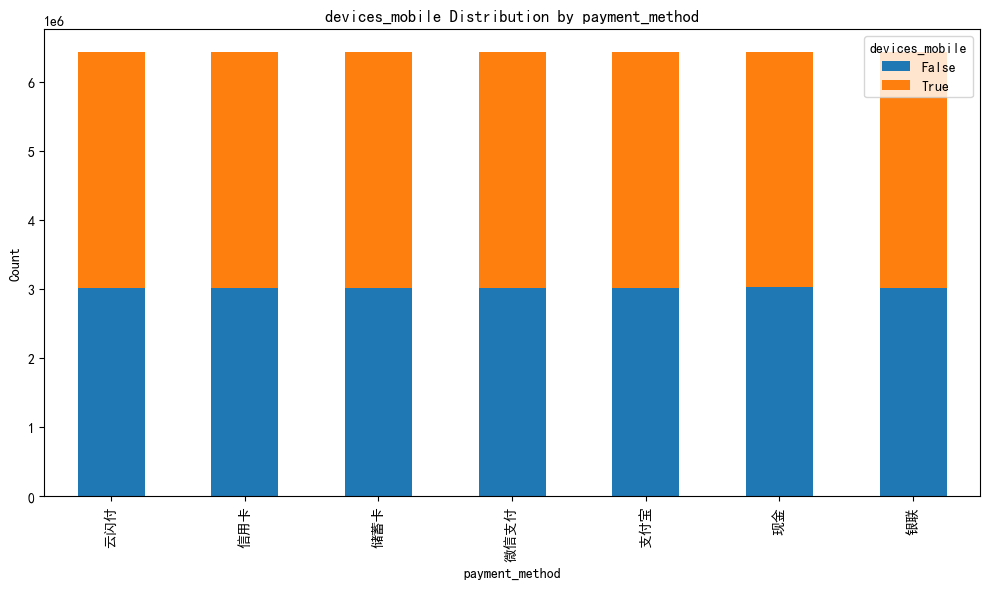

In [12]:
visualizations.draw_stacked_barplot(df, category_col='payment_method', subcategory_col='devices_mobile')
